# Sunlight In Austin (Working through Pandas) 

Questions to be answered

1. On average, how much hotter was everyday in 2011 in comparison with 2010?
2. On average, how much hotter is it when the sun is shining?
3. Is there a correlation between temperature and visibility?
4. What is the fraction of days that are sunny days?
5. What is the probability of finding a hotter 2011 day when compared to 2010?

## 1. Loading Data

    - Dealing with messy data by using the right parameters of pd.read_csv()
    - Selecting new column labels using df.columns
    - Excluding irrelevant attributes with df.drop()
    - Analyzing data types with df.info()

In [146]:
import pandas as pd

df = pd.read_csv('C:\\Datasets\\sunlight_austin\\2011_Austin_Weather.txt')
df.head()


,13904,20110101,0053,12,OVC045,,10.00,.1,.2,.3,...,.18,.19,29.95,.20,AA,.21,.22,.23,29.95.1,.24
0,13904,20110101,153,12,OVC049,,10.00,,,,...,,,30.01,,AA,,,,30.02,
1,13904,20110101,253,12,OVC060,,10.00,,,,...,030,,30.01,,AA,,,,30.02,
2,13904,20110101,353,12,OVC065,,10.00,,,,...,,,30.03,,AA,,,,30.04,
3,13904,20110101,453,12,BKN070,,10.00,,,,...,,,30.04,,AA,,,,30.04,
4,13904,20110101,553,12,BKN065,,10.00,,,,...,015,,30.06,,AA,,,,30.06,


Looking at the results above we can see there is no header, and thus the columns don't have labels. There is also no obvious index column, since none of the data columns contain a full date or time.

So we will start by indicating header='None' in pd.read_csv(). Next, we will use the column_label.txt file to generate a list of strings that will be used as our new columns labels.

In [147]:
import pandas as pd

df = pd.read_csv('C:\\Datasets\\sunlight_austin\\2011_Austin_Weather.txt',header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
0,13904,20110101,53,12,OVC045,,10.00,,,,...,,,29.95,,AA,,,,29.95,
1,13904,20110101,153,12,OVC049,,10.00,,,,...,,,30.01,,AA,,,,30.02,
2,13904,20110101,253,12,OVC060,,10.00,,,,...,030,,30.01,,AA,,,,30.02,
3,13904,20110101,353,12,OVC065,,10.00,,,,...,,,30.03,,AA,,,,30.04,
4,13904,20110101,453,12,BKN070,,10.00,,,,...,,,30.04,,AA,,,,30.04,


In [148]:
column_labels_list = list(pd.read_csv('C://Datasets//sunlight_austin/column_labels.txt'))
column_labels_list

['Wban',
 'date',
 'Time',
 'StationType',
 'sky_condition',
 'sky_conditionFlag',
 'visibility',
 'visibilityFlag',
 'wx_and_obst_to_vision',
 'wx_and_obst_to_visionFlag',
 'dry_bulb_faren',
 'dry_bulb_farenFlag',
 'dry_bulb_cel',
 'dry_bulb_celFlag',
 'wet_bulb_faren',
 'wet_bulb_farenFlag',
 'wet_bulb_cel',
 'wet_bulb_celFlag',
 'dew_point_faren',
 'dew_point_farenFlag',
 'dew_point_cel',
 'dew_point_celFlag',
 'relative_humidity',
 'relative_humidityFlag',
 'wind_speed',
 'wind_speedFlag',
 'wind_direction',
 'wind_directionFlag',
 'value_for_wind_character',
 'value_for_wind_characterFlag',
 'station_pressure',
 'station_pressureFlag',
 'pressure_tendency',
 'pressure_tendencyFlag',
 'presschange',
 'presschangeFlag',
 'sea_level_pressure',
 'sea_level_pressureFlag',
 'record_type',
 'hourly_precip',
 'hourly_precipFlag',
 'altimeter',
 'altimeterFlag',
 'junk']

In [149]:
df.columns = column_labels_list
df.head()

,Wban,date,Time,StationType,sky_condition,sky_conditionFlag,visibility,visibilityFlag,wx_and_obst_to_vision,wx_and_obst_to_visionFlag,...,presschange,presschangeFlag,sea_level_pressure,sea_level_pressureFlag,record_type,hourly_precip,hourly_precipFlag,altimeter,altimeterFlag,junk
0,13904,20110101,53,12,OVC045,,10.00,,,,...,,,29.95,,AA,,,,29.95,
1,13904,20110101,153,12,OVC049,,10.00,,,,...,,,30.01,,AA,,,,30.02,
2,13904,20110101,253,12,OVC060,,10.00,,,,...,030,,30.01,,AA,,,,30.02,
3,13904,20110101,353,12,OVC065,,10.00,,,,...,,,30.03,,AA,,,,30.04,
4,13904,20110101,453,12,BKN070,,10.00,,,,...,,,30.04,,AA,,,,30.04,


### Excluding irrelevant attributes

 We are working with 44 columns, for our analysis  we only need a fraction of that. So we drop the irrelevant attributes.

In [150]:
list_to_drop = ['sky_conditionFlag',
 'visibilityFlag',
 'wx_and_obst_to_vision',
 'wx_and_obst_to_visionFlag',
 'dry_bulb_farenFlag',
 'dry_bulb_celFlag',
 'wet_bulb_farenFlag',
 'wet_bulb_celFlag',
 'dew_point_farenFlag',
 'dew_point_celFlag',
 'relative_humidityFlag',
 'wind_speedFlag',
 'wind_directionFlag',
 'value_for_wind_character',
 'value_for_wind_characterFlag',
 'station_pressureFlag',
 'pressure_tendencyFlag',
 'pressure_tendency',
 'presschange',
 'presschangeFlag',
 'sea_level_pressureFlag',
 'hourly_precip',
 'hourly_precipFlag',
 'altimeter',
 'record_type',
 'altimeterFlag',
 'junk']

In [151]:
df_dropped = df.drop(list_to_drop,axis = 'columns')
df_dropped.head()

,Wban,date,Time,StationType,sky_condition,visibility,dry_bulb_faren,dry_bulb_cel,wet_bulb_faren,wet_bulb_cel,dew_point_faren,dew_point_cel,relative_humidity,wind_speed,wind_direction,station_pressure,sea_level_pressure
0,13904,20110101,53,12,OVC045,10.00,51,10.6,38,3.1,15,-9.4,24,15,360,29.42,29.95
1,13904,20110101,153,12,OVC049,10.00,51,10.6,37,3.0,14,-10.0,23,10,340,29.49,30.01
2,13904,20110101,253,12,OVC060,10.00,51,10.6,37,2.9,13,-10.6,22,15,010,29.49,30.01
3,13904,20110101,353,12,OVC065,10.00,50,10.0,38,3.1,17,-8.3,27,7,350,29.51,30.03
4,13904,20110101,453,12,BKN070,10.00,50,10.0,37,2.8,15,-9.4,25,11,020,29.51,30.04


In [152]:
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10337 entries, 0 to 10336
Data columns (total 17 columns):
Wban                  10337 non-null int64
date                  10337 non-null int64
Time                  10337 non-null int64
StationType           10337 non-null int64
sky_condition         10337 non-null object
visibility            10337 non-null object
dry_bulb_faren        10337 non-null object
dry_bulb_cel          10337 non-null object
wet_bulb_faren        10337 non-null object
wet_bulb_cel          10337 non-null object
dew_point_faren       10337 non-null object
dew_point_cel         10337 non-null object
relative_humidity     10337 non-null object
wind_speed            10337 non-null object
wind_direction        10337 non-null object
station_pressure      10337 non-null object
sea_level_pressure    10337 non-null object
dtypes: int64(4), object(13)
memory usage: 1.3+ MB


# Building a Time series index

    - Changing data types with df.astype()
    - Formatting and creating the time series index with pd.to_datetime() and pd.set_index()
    - Checking and specifying missing values ussing parameter errors='coerce' 
    - Advanced data slicing using time series

As shown above we now have a total of 17 columns that are interesting for our analysis. The method df.info() also brings valuable information regarding data types, as you can see both date and time are int64. 

Since our next step is generating the time series index those attributes will need to be concatenated, which means that we first need to convert their types.

To concatenate date and time to work in a time series index the best strategy is converting to string and then using a string sum to reach something like 'YYYY-MM-DD HH:MM:SS'. Once with this format we use pd.to_datetime() followed by df_dropped.set_index().


In [153]:
#pd.to_datetime(df.date + df.Time)

# Pad leading zeros to the Time column: df_dropped['Time']
df_dropped['Time'] = df_dropped['Time'].apply(lambda x:'{:0>4}'.format(x))

df_dropped['Time'][0:5]


0    0053
1    0153
2    0253
3    0353
4    0453
Name: Time, dtype: object

In [154]:
df_dropped.date = df_dropped.date.astype(str)
df_dropped[['date', 'Time']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10337 entries, 0 to 10336
Data columns (total 2 columns):
date    10337 non-null object
Time    10337 non-null object
dtypes: object(2)
memory usage: 161.6+ KB


In [155]:
# Concatenate the new date and Time columns & format
date_times = pd.to_datetime(df_dropped.date + df_dropped.Time,format= '%Y%m%d%H%M')


In [156]:
## Set the index to date_times

df_clean = df_dropped.set_index(date_times)


In [157]:
df_clean.head()

,Wban,date,Time,StationType,sky_condition,visibility,dry_bulb_faren,dry_bulb_cel,wet_bulb_faren,wet_bulb_cel,dew_point_faren,dew_point_cel,relative_humidity,wind_speed,wind_direction,station_pressure,sea_level_pressure
2011-01-01 00:53:00,13904,20110101,0053,12,OVC045,10.00,51,10.6,38,3.1,15,-9.4,24,15,360,29.42,29.95
2011-01-01 01:53:00,13904,20110101,0153,12,OVC049,10.00,51,10.6,37,3.0,14,-10.0,23,10,340,29.49,30.01
2011-01-01 02:53:00,13904,20110101,0253,12,OVC060,10.00,51,10.6,37,2.9,13,-10.6,22,15,010,29.49,30.01
2011-01-01 03:53:00,13904,20110101,0353,12,OVC065,10.00,50,10.0,38,3.1,17,-8.3,27,7,350,29.51,30.03
2011-01-01 04:53:00,13904,20110101,0453,12,BKN070,10.00,50,10.0,37,2.8,15,-9.4,25,11,020,29.51,30.04


Now we have our date time index for pursuing our analysis & getting insights

In [158]:
df_clean.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10337 entries, 2011-01-01 00:53:00 to 2011-12-31 23:53:00
Data columns (total 17 columns):
Wban                  10337 non-null int64
date                  10337 non-null object
Time                  10337 non-null object
StationType           10337 non-null int64
sky_condition         10337 non-null object
visibility            10337 non-null object
dry_bulb_faren        10337 non-null object
dry_bulb_cel          10337 non-null object
wet_bulb_faren        10337 non-null object
wet_bulb_cel          10337 non-null object
dew_point_faren       10337 non-null object
dew_point_cel         10337 non-null object
relative_humidity     10337 non-null object
wind_speed            10337 non-null object
wind_direction        10337 non-null object
station_pressure      10337 non-null object
sea_level_pressure    10337 non-null object
dtypes: int64(2), object(15)
memory usage: 1.4+ MB


In [159]:
print(df_clean.loc['2011-6-20 8:00:00':'2011-6-20 9:00:00', 'dry_bulb_faren'])

2011-06-20 08:27:00     M
2011-06-20 08:28:00     M
2011-06-20 08:29:00     M
2011-06-20 08:30:00     M
2011-06-20 08:31:00     M
2011-06-20 08:32:00     M
2011-06-20 08:33:00     M
2011-06-20 08:34:00     M
2011-06-20 08:35:00     M
2011-06-20 08:53:00    83
Name: dry_bulb_faren, dtype: object


### To Check Rows in Data Frame that don't have digits or missing values. Here 'M' seems to represent missing values. Even though .info() method shows all non-null values, a lot of the numeric fields are coded as objects because of string values such as 'M' to denote missing values.


In [160]:
# for Column 'dry_bulb_faren'
# import re
bulb_fahr = df_clean['dry_bulb_faren']
pattern = '\d+'
mask = bulb_fahr.str.contains(pattern)
bulb_fahr[~mask]


2011-06-20 08:27:00    M
2011-06-20 08:28:00    M
2011-06-20 08:29:00    M
2011-06-20 08:30:00    M
2011-06-20 08:31:00    M
2011-06-20 08:32:00    M
2011-06-20 08:33:00    M
2011-06-20 08:34:00    M
2011-06-20 08:35:00    M
2011-06-25 03:01:00    M
2011-06-25 04:28:00    M
Name: dry_bulb_faren, dtype: object

In [161]:
df_clean[~mask]

,Wban,date,Time,StationType,sky_condition,visibility,dry_bulb_faren,dry_bulb_cel,wet_bulb_faren,wet_bulb_cel,dew_point_faren,dew_point_cel,relative_humidity,wind_speed,wind_direction,station_pressure,sea_level_pressure
2011-06-20 08:27:00,13904,20110620,0827,12,M,null,M,M,M,M,M,M,M,M,M,M,M
2011-06-20 08:28:00,13904,20110620,0828,12,M,null,M,M,M,M,M,M,M,M,M,M,M
2011-06-20 08:29:00,13904,20110620,0829,12,M,null,M,M,M,M,M,M,M,M,M,M,M
2011-06-20 08:30:00,13904,20110620,0830,12,M,null,M,M,M,M,M,M,M,M,M,M,M
2011-06-20 08:31:00,13904,20110620,0831,12,M,null,M,M,M,M,M,M,M,M,M,M,M
2011-06-20 08:32:00,13904,20110620,0832,12,M,null,M,M,M,M,M,M,M,M,M,M,M
2011-06-20 08:33:00,13904,20110620,0833,12,M,null,M,M,M,M,M,M,M,M,M,M,M
2011-06-20 08:34:00,13904,20110620,0834,12,M,null,M,M,M,M,M,M,M,M,M,M,M
2011-06-20 08:35:00,13904,20110620,0835,12,M,null,M,M,M,M,M,M,M,M,M,M,M
2011-06-25 03:01:00,13904,20110625,0301,12,SCT014 OVC030,10.00,M,M,M,M,M,M,M,8,170,29.30,M


Since we need many of those attributes to be converted from object to numeric we are going to solve both, missing values and type convertion by using pd.to_numeric() specifying the parameter errors='coerce', this way whenever a convertion error happens, such as string to float, the values is converted to a NaN (np.NaN), representing a missing value.

For the purpose of our analysis, only dry_bulb_faren, wind_speed, and dew_point_faren will be converted.

In [162]:
# Converting M's to NaN (M's probably signify missing values)
df_clean['dry_bulb_faren'] = pd.to_numeric(df_clean['dry_bulb_faren'], errors = 'coerce')

In [163]:
print(df_clean.loc['2011-6-20 8:00:00':'2011-6-20 9:00:00', 'dry_bulb_faren'])


2011-06-20 08:27:00     NaN
2011-06-20 08:28:00     NaN
2011-06-20 08:29:00     NaN
2011-06-20 08:30:00     NaN
2011-06-20 08:31:00     NaN
2011-06-20 08:32:00     NaN
2011-06-20 08:33:00     NaN
2011-06-20 08:34:00     NaN
2011-06-20 08:35:00     NaN
2011-06-20 08:53:00    83.0
Name: dry_bulb_faren, dtype: float64


In [164]:
print(df_clean.loc['2011-6-20 8:00:00':'2011-6-20 9:00:00', 'dry_bulb_faren'])


2011-06-20 08:27:00     NaN
2011-06-20 08:28:00     NaN
2011-06-20 08:29:00     NaN
2011-06-20 08:30:00     NaN
2011-06-20 08:31:00     NaN
2011-06-20 08:32:00     NaN
2011-06-20 08:33:00     NaN
2011-06-20 08:34:00     NaN
2011-06-20 08:35:00     NaN
2011-06-20 08:53:00    83.0
Name: dry_bulb_faren, dtype: float64


In [165]:
df_clean.wind_speed.value_counts()

 0    1485
10     783
 8     754
 9     747
11     711
 7     697
 6     679
 5     668
13     643
 3     630
14     572
15     476
16     343
17     300
18     288
20     153
21     136
22      86
23      72
24      41
25      20
M       19
26      14
28      10
29       6
30       4
Name: wind_speed, dtype: int64

In [166]:
# Convert the wind_speed and dew_point_faren columns to numeric values
df_clean['wind_speed'] = pd.to_numeric(df_clean['wind_speed'], errors='coerce')
df_clean['dew_point_faren'] = pd.to_numeric(df_clean['dew_point_faren'], errors='coerce')

In [167]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10337 entries, 2011-01-01 00:53:00 to 2011-12-31 23:53:00
Data columns (total 17 columns):
Wban                  10337 non-null int64
date                  10337 non-null object
Time                  10337 non-null object
StationType           10337 non-null int64
sky_condition         10337 non-null object
visibility            10337 non-null object
dry_bulb_faren        10326 non-null float64
dry_bulb_cel          10337 non-null object
wet_bulb_faren        10337 non-null object
wet_bulb_cel          10337 non-null object
dew_point_faren       10323 non-null float64
dew_point_cel         10337 non-null object
relative_humidity     10337 non-null object
wind_speed            10318 non-null float64
wind_direction        10337 non-null object
station_pressure      10337 non-null object
sea_level_pressure    10337 non-null object
dtypes: float64(3), int64(2), object(12)
memory usage: 1.7+ MB


In [168]:
df_clean.head()

,Wban,date,Time,StationType,sky_condition,visibility,dry_bulb_faren,dry_bulb_cel,wet_bulb_faren,wet_bulb_cel,dew_point_faren,dew_point_cel,relative_humidity,wind_speed,wind_direction,station_pressure,sea_level_pressure
2011-01-01 00:53:00,13904,20110101,0053,12,OVC045,10.00,51.0,10.6,38,3.1,15.0,-9.4,24,15.0,360,29.42,29.95
2011-01-01 01:53:00,13904,20110101,0153,12,OVC049,10.00,51.0,10.6,37,3.0,14.0,-10.0,23,10.0,340,29.49,30.01
2011-01-01 02:53:00,13904,20110101,0253,12,OVC060,10.00,51.0,10.6,37,2.9,13.0,-10.6,22,15.0,010,29.49,30.01
2011-01-01 03:53:00,13904,20110101,0353,12,OVC065,10.00,50.0,10.0,38,3.1,17.0,-8.3,27,7.0,350,29.51,30.03
2011-01-01 04:53:00,13904,20110101,0453,12,BKN070,10.00,50.0,10.0,37,2.8,15.0,-9.4,25,11.0,020,29.51,30.04


# Statistical EDA 

    - Downsample data from hours to day using df.resample()
    - Getting basic statistics with df.mean()
    - Answer Question 1 - On average, how much hotter was everyday in 2011 in comparison with 2010?
    - Answer Question 2 - On average, how much hotter is it when the sun is shining?

Different ways to query 

In [169]:
# Print the median of the dry_bulb_faren column
print(df_clean.dry_bulb_faren.median())

72.0


In [170]:
# Print the median of the dry_bulb_faren column for the time range '2011-Apr':'2011-Jun'
print(df_clean.loc['2011-Apr':'2011-Jun', 'dry_bulb_faren'].median())

78.0


In [171]:
# Print the median of the dry_bulb_faren column for the month of January
print(df_clean.loc['2011-Jan','dry_bulb_faren'].median())

48.0


### Importing the 2010 Austin weather data for making comparisons

In [172]:
# import 30-year normals of climate data reported in 2010

df_climate = pd.read_csv('C://Datasets//sunlight_austin/weather_data_austin_2010.csv',parse_dates= True,index_col='Date')
df_climate.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8759 entries, 2010-01-01 00:00:00 to 2010-12-31 23:00:00
Data columns (total 3 columns):
Temperature    8759 non-null float64
DewPoint       8759 non-null float64
Pressure       8759 non-null float64
dtypes: float64(3)
memory usage: 273.7 KB


### Downsample for day base index

We already have our tidy data df_clean with time series index, all great. However, the index is hourly based, which is not convenient in case we want to work with monthly averages or even comparison between days. We solve this usign df.resample().

In [173]:
# Signal variance
# We can ask questions such as, on average, how much hotter was every day in 2011 than expected from the 30-year average?

# Downsample df_clean by day and aggregate by mean: daily_mean_2011
daily_mean_2011 = df_clean.resample('D').mean()

# Extract the dry_bulb_faren column from daily_mean_2011 using .values: daily_temp_2011
daily_temp_2011 = daily_mean_2011.dry_bulb_faren.values

# Downsample df_climate by day and aggregate by mean: daily_climate
daily_climate = df_climate.resample('D').mean()

# Extract the Temperature column from daily_climate using .reset_index(): daily_temp_climate
daily_temp_climate = daily_climate.reset_index()['Temperature']




## Question 1 - On average, how much hotter was everyday in 2011 in comparison with 2010?

Having both daily temperatures arrays from 2010 and 2011 we calculate the mean() difference to answer Question 1

As computed below the average daily temperature was 1.33 higher between 2011 and 2010.

In [174]:
# Compute the difference between the two arrays and print the mean difference
difference = daily_temp_2011 - daily_temp_climate
print(difference.mean())


1.3301831870056482


## Question 2 - On average, how much hotter is it when the sun is shining?

Similar analysis from Question 1, however this time we're also considering an extra variable wich is 'sky_condition'. In our data set, CLR stands for sunny days and OVC stands for overcast.

As computed below in 2011 sunny days were 6.5 hotter than in 2010.

In [175]:
# Sunny or cloudy
# On average, how much hotter is it when the sun is shining? 
# We will compare temperatures on sunny days against temperatures on overcast days.

df_clean['sky_condition'][0:5]

2011-01-01 00:53:00    OVC045
2011-01-01 01:53:00    OVC049
2011-01-01 02:53:00    OVC060
2011-01-01 03:53:00    OVC065
2011-01-01 04:53:00    BKN070
Name: sky_condition, dtype: object

In [176]:
# Select days that are sunny: sunny is 'CLR' while overcast is 'OVC'.
sunny = df_clean[df_clean.sky_condition == 'CLR']
print(sunny.head(1))

                      Wban      date  Time  StationType sky_condition  \
2011-01-01 13:53:00  13904  20110101  1353           12           CLR   

                    visibility  dry_bulb_faren dry_bulb_cel wet_bulb_faren  \
2011-01-01 13:53:00      10.00            59.0         15.0             45   

                    wet_bulb_cel  dew_point_faren dew_point_cel  \
2011-01-01 13:53:00          7.0             26.0          -3.3   

                    relative_humidity  wind_speed wind_direction  \
2011-01-01 13:53:00                28        14.0            010   

                    station_pressure sea_level_pressure  
2011-01-01 13:53:00            29.63              30.16  


In [177]:
# Select days that are overcast: overcast
overcast = df_clean[df_clean.sky_condition.str.contains('OVC')]
print(overcast.head(1))

                      Wban      date  Time  StationType sky_condition  \
2011-01-01 00:53:00  13904  20110101  0053           12        OVC045   

                    visibility  dry_bulb_faren dry_bulb_cel wet_bulb_faren  \
2011-01-01 00:53:00      10.00            51.0         10.6             38   

                    wet_bulb_cel  dew_point_faren dew_point_cel  \
2011-01-01 00:53:00          3.1             15.0          -9.4   

                    relative_humidity  wind_speed wind_direction  \
2011-01-01 00:53:00                24        15.0            360   

                    station_pressure sea_level_pressure  
2011-01-01 00:53:00            29.42              29.95  


In [178]:

# Resample sunny and overcast, aggregating by maximum daily temperature
sunny_daily_max = sunny.resample('D').max()
overcast_daily_max = overcast.resample('D').max()

# Print the difference between the mean of sunny_daily_max and overcast_daily_max
print(sunny_daily_max.mean() - overcast_daily_max.mean())


Wban               0.000000
StationType        0.000000
dry_bulb_faren     6.504304
dew_point_faren   -4.339286
wind_speed        -3.246062
dtype: float64


# Visual exploratory data analysis

    - Answer Question 3 - Is there a correlation between temperature and visibility?
    - Good practices for debugging
    - Visualizing the correlation
    - Visualizing the hotter days (Question 1)
    - Seasonal decomposition of hotter days
    - Answer Question 4 - What is the fraction of days that are sunny days?
    - Answer Question 5 - What is the probability of finding a hotter 2011 day when compared to 2010?

## Question 3 - Is there a correlation between temperature and visibility?¶

We start extracting both attributes 'visibility' and 'dry_bulb_faren' from 2011 data. Also to give some more df.resample() practice we are going to analyse this in a weekly basis. For the correlation we are computing the Pearson correlation with .corr(), the output from this method will give us results from +1 to -1, the positive one stands for a positive linear correlation and the negative for negative linear correlation, therefore in our case we are looking for the values closer to +1 indicating strong linear correlation.

As computed below a 0.49 correlation could be considered a medium correlation between temperature and visibility.

In [179]:
# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

df_clean['visibility'] = pd.to_numeric(df_clean['visibility'], errors = 'coerce')


In [180]:
# Select the visibility and dry_bulb_faren columns and resample them: weekly_mean
weekly_mean = df_clean[['visibility','dry_bulb_faren']].resample('W').mean()
print(weekly_mean[0:5])

            visibility  dry_bulb_faren
2011-01-02   10.000000       44.791667
2011-01-09    8.275785       50.246637
2011-01-16    6.451651       41.103774
2011-01-23    8.370853       47.194313
2011-01-30    9.966851       53.486188


In [181]:
# Print the output of weekly_mean.corr()
print(weekly_mean.corr())

                visibility  dry_bulb_faren
visibility        1.000000        0.490328
dry_bulb_faren    0.490328        1.000000


### Visualizing the correlation computation?

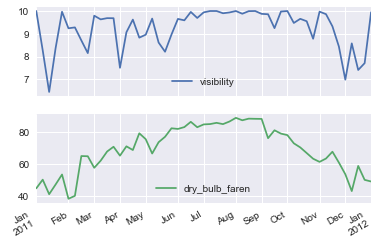

In [182]:
# Plot weekly_mean with subplots=True
weekly_mean.plot(subplots=True)
plt.show()

## Question 4 - What is the fraction of days that are sunny days?

To extract the fraction of sunny days we further evaluate sky_condition for 'CLR' but this time using box plots. The strategy here is using the variable sunny, which is a boolean for containing CLR (review it on Question 2) and add its values, since booleans can be operated as zeros and ones. This will give us the total amount of sunny hours. To get the fraction we need to divide the previous value by the total hours which is found by using a sunny.resample('D').count(). In addition and to clarify the box plot result, we generate a histogram distribution so facilitating comparison.

As computed below The median for sunny days is around 18%. As a further information provided by the box plot and histogram comparison 75% of the values are under 40% of sunny days, on histogram higher frequencies on the left side 

In [183]:
# Daily hours of clear sky

# Create a Boolean Series for sunny days: sunny
sunny = df_clean['sky_condition'] == 'CLR'

In [184]:
# Resample the Boolean Series by day and compute the sum: sunny_hours
sunny_hours = sunny.resample('D').sum()
print(sunny_hours[0:5])

2011-01-01    11.0
2011-01-02     7.0
2011-01-03     3.0
2011-01-04     0.0
2011-01-05     1.0
Freq: D, Name: sky_condition, dtype: float64


In [185]:
total_hours = sunny.resample('D').count()
print(total_hours[0:5])

2011-01-01    24
2011-01-02    24
2011-01-03    26
2011-01-04    49
2011-01-05    29
Freq: D, Name: sky_condition, dtype: int64


In [186]:
sunny_fraction = sunny_hours / total_hours
print(sunny_fraction[0:5])

2011-01-01    0.458333
2011-01-02    0.291667
2011-01-03    0.115385
2011-01-04    0.000000
2011-01-05    0.034483
Freq: D, Name: sky_condition, dtype: float64


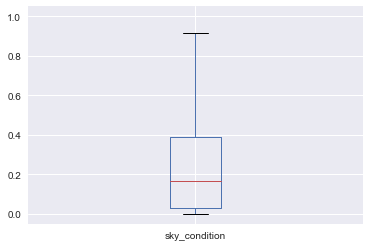

In [187]:
# Make a box plot of sunny_fraction
sunny_fraction.plot(kind='box')
plt.show()

In [188]:
# Heat or humidity
# Resample dew_point_faren and dry_bulb_faren by Month, aggregating the maximum values: monthly_max
monthly_max = df_clean[['dew_point_faren', 'dry_bulb_faren']].resample('M').max()

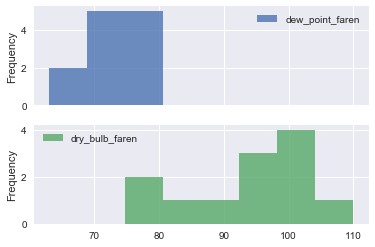

In [189]:
# Generate a histogram with bins=8, alpha=0.5, subplots=True
monthly_max.plot(kind='hist', bins = 8, alpha = 0.8, subplots= True)

# Show the plot
plt.show()

## Question 4 - What is the fraction of days that are sunny days?

We already know that 2011 was hotter than the climate normals for the previous years. In this final question, we compare the maximum temperature in August 2011 against that of the August 2010 climate normals. More specifically, we will use a CDF (Cumulative Distribution Function) plot to determine the probability of the 2011 daily maximum temperature in August being above the 2010 climate normal value.

As computed below There is a 50% chance of the 2011 daily maximum temperature in August being 7 degrees above the 2010 climate normal value!

In [203]:
# Extract the maximum temperature in August 2010 from df_climate: august_max
august_max = df_climate.loc['2010-Aug','Temperature'].max()
print('Max temperature registered in August 2010 was ' + str(august_max))

Max temperature registered in August 2010 was 95.3


In [201]:
# Resample August 2011 temps in df_clean by day & aggregate the max value: august_2011
august_2011 =  df_clean.loc['2011-Aug','dry_bulb_faren'].resample('D').max()
print('Max temperature registered in August 2011 was ' + str(august_2011.max()))

Max temperature registered in August 2011 was 110.0


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


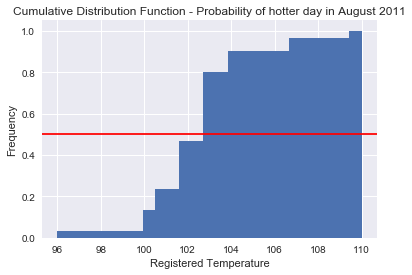

In [195]:
# Filter for days in august_2011 where the value exceeds august_max: august_2011_high
august_2011_high = august_2011.loc[august_2011 > august_max]

# Construct a CDF of august_2011_high
august_2011_high.plot(kind ='hist', normed = True, cumulative = True, bins = 25)

# Display the plot
plt.title('Cumulative Distribution Function - Probability of hotter day in August 2011')
plt.xlabel('Registered Temperature')
plt.axhline(y=0.5, color='r', linestyle='-')
plt.show()